In [1]:
import pandas as pd

df = pd.read_csv('c:/data/time/kings.dat', header=None, names=['ages'])

<AxesSubplot:>

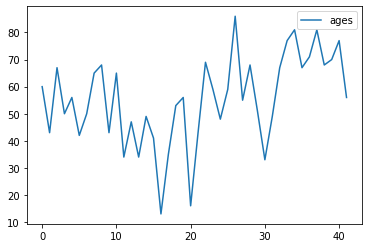

In [2]:
df.plot()

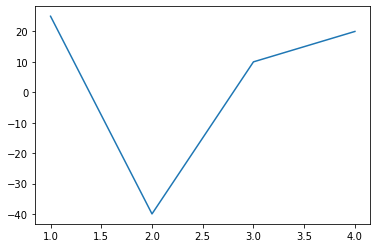

In [3]:
import matplotlib.pyplot as plt

#안정적인 시계열 : 시간의 추이와 관계없이 평균, 분산이 일정함
#불안정 시계열 : 차분을 통해 시계열을 안정적으로 변환 후 분석
a = pd.Series([1025,1050,1010,1020,1040])
b = a.diff(periods=1).iloc[1:]
plt.plot(b)

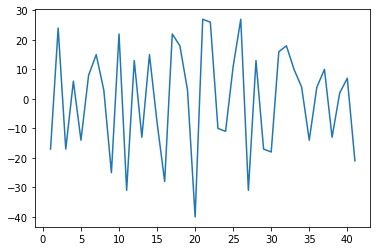

In [4]:
# 차분 : 현시점 자료에서 전시점 자료를 빼는 것
diff1 = df['ages'].diff(periods=1).iloc[1:]
diff1.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller
import numpy as np

diff1 = np.log(df['ages']).diff(periods=1).iloc[1:]
result = adfuller(diff1)
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#p-value가 0.05보다 작음 >>> 95% 신뢰수준 하에서 유의함

(-7.446856429613952, 5.807660899733621e-11, 2, 38, {'1%': -3.6155091011809297, '5%': -2.941262357486514, '10%': -2.6091995013850418}, 32.20496009678498)
ADF Statistic: -7.446856
p-value: 0.000000


In [6]:
#가장 적절한 arima 모델을 추천해주는 함수
# arima : AR모형과 MA모형을 결합한 함수
# arima(p, d, q)
# ar(p) 자기상관모형 : 이전의 값이 이후에 값에 영향을 미치는 모형
# ma(q) 이동평균 : 시간이 지날수록 평균값이 지속적으로 증가하거나 감소하는 영향
# ma(1 ) 직전 데이터가 다음 데이터에 영향을 주는 경우
from pmdarima.arima import auto_arima
model = auto_arima(df)
model

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [8]:
train = df[:30]
test = df[30:]
print(len(df['ages']))
print(df['ages'].values)
print(df['ages'].values)

42
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]
[60 43 67 50 56 42 50 65 68 43 65 34 47 34 49 41 13 35 53 56 16 43 69 59
 48 59 86 55 68 51 33 49 67 77 81 67 71 81 68 70 77 56]


In [9]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(train, order=(0,1,1)).fit()

In [10]:
#예측값
fore = model.forecast(steps=5)
print(fore)

(array([59.52326706, 59.7174093 , 59.91155154, 60.10569379, 60.29983603]), array([15.67413926, 16.19266133, 16.69508672, 17.18282747, 17.65710054]), array([[28.80251862, 90.24401549],
       [27.98037628, 91.45444232],
       [27.18978286, 92.63332023],
       [26.42797079, 93.78341679],
       [25.6925549 , 94.90711716]]))


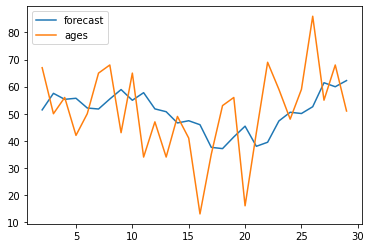

In [11]:
# 실제값과 예측값
model.plot_predict()
plt.show()

[33 49 67 77 81 67 71 81 68 70 77 56]
[59.52326706 59.7174093  59.91155154 60.10569379 60.29983603 60.49397827
 60.68812052 60.88226276 61.07640501 61.27054725 61.46468949 61.65883174]


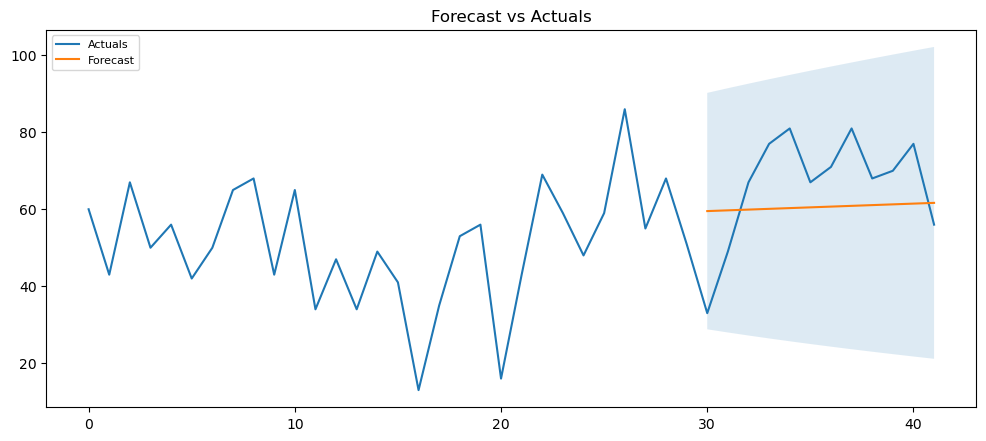

In [13]:
fc, se, conf = model.forecast(steps=len(test))
print(test['ages'].values)
print(fc)
fc_series = pd.Series(fc, index=test.index)
lower = pd.Series(conf[:,0], index=test.index)
upper = pd.Series(conf[:,1], index=test.index)

plt.figure(figsize=(12,5), dpi=100)
plt.plot(df, label='Actuals')
plt.plot(fc_series, label='Forecast')

plt.fill_between(lower.index, lower, upper, alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()